In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV

# Step 1: Load the dataset
file_path = "C:\\Users\\Administrator\\OneDrive\\Desktop\\Fatima-Labs\\ML\\lab 11\\heart_disease_uci.csv"
df = pd.read_csv(file_path)

# Step 1.1: Check column names to identify the target variable
print("Column Names in the Dataset:\n", df.columns)

# Assuming the target variable is the last column
target_column = 'target'  # Update this if the target column has a different name

# Step 1.2: Handle missing values using SimpleImputer (for numerical columns)
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Check if there are any missing values now
print("\nMissing values after preprocessing:\n", df_imputed.isnull().sum())

# Step 2: Exploratory Data Analysis (EDA)
# Display basic statistics
print("\nBasic statistics of the dataset:\n", df_imputed.describe())

# Visualize the distribution of features
sns.pairplot(df_imputed, hue=target_column)
plt.show()

# Step 3: Feature Engineering
# Encode categorical variables (if any)
df_imputed = pd.get_dummies(df_imputed, drop_first=True)

# Separate features (X) and target (y)
X = df_imputed.drop(target_column, axis=1)
y = df_imputed[target_column]

# Normalize numerical features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Model selection and training
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the SVM model (linear kernel)
svm = SVC(kernel='linear')

# Train the SVM model
svm.fit(X_train, y_train)

# Step 5: Model evaluation
# Predict on the testing set
y_pred = svm.predict(X_test)

# Evaluate the model
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Step 6: Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
print("\nBest Parameters from GridSearchCV:\n", grid_search.best_params_)
print("\nBest Score from GridSearchCV:", grid_search.best_score_)

# Retrain the model with the best parameters
best_svm = grid_search.best_estimator_
best_svm.fit(X_train, y_train)

# Step 7: Conclusion
# Evaluate the final model on the test set
y_pred_best = best_svm.predict(X_test)
print("\nFinal Classification Report (Best Model):\n", classification_report(y_test, y_pred_best))
print("\nFinal Confusion Matrix (Best Model):\n", confusion_matrix(y_test, y_pred_best))

# Visualize the confusion matrix for the best model
cm_best = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm_best, annot=True, fmt="d", cmap="Blues", xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Best Model)')
plt.show()

# Insights on the most important features (if available)
# Feature importance can be derived from SVM with linear kernel coefficients
if 'coef_' in dir(best_svm):
    feature_importance = pd.Series(best_svm.coef_.flatten(), index=X.columns)
    feature_importance = feature_importance.sort_values(ascending=False)
    print("\nFeature Importance:\n", feature_importance)


Column Names in the Dataset:
 Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


ValueError: Cannot use median strategy with non-numeric data:
could not convert string to float: 'Male'

Column Names in the Dataset:
 Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

Missing values after preprocessing:
 id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

Basic statistics of the dataset:
                id         age    trestbps        chol      thalch     oldpeak  \
count  920.000000  920.000000  920.000000  920.000000  920.000000  920.000000   
mean   460.500000   53.510870  131.995652  199.908696  137.692391    0.853261   
std    265.725422    9.424685   18.451300  109.040171   25.145235    1.058049   
min      1.000000   28.000000    0.000000    0.000000   60.000000   -2.600000   
25%    230.750000   47.000000  120.000000  177.750000  120.000000    0.000000   
50

KeyError: 'target'

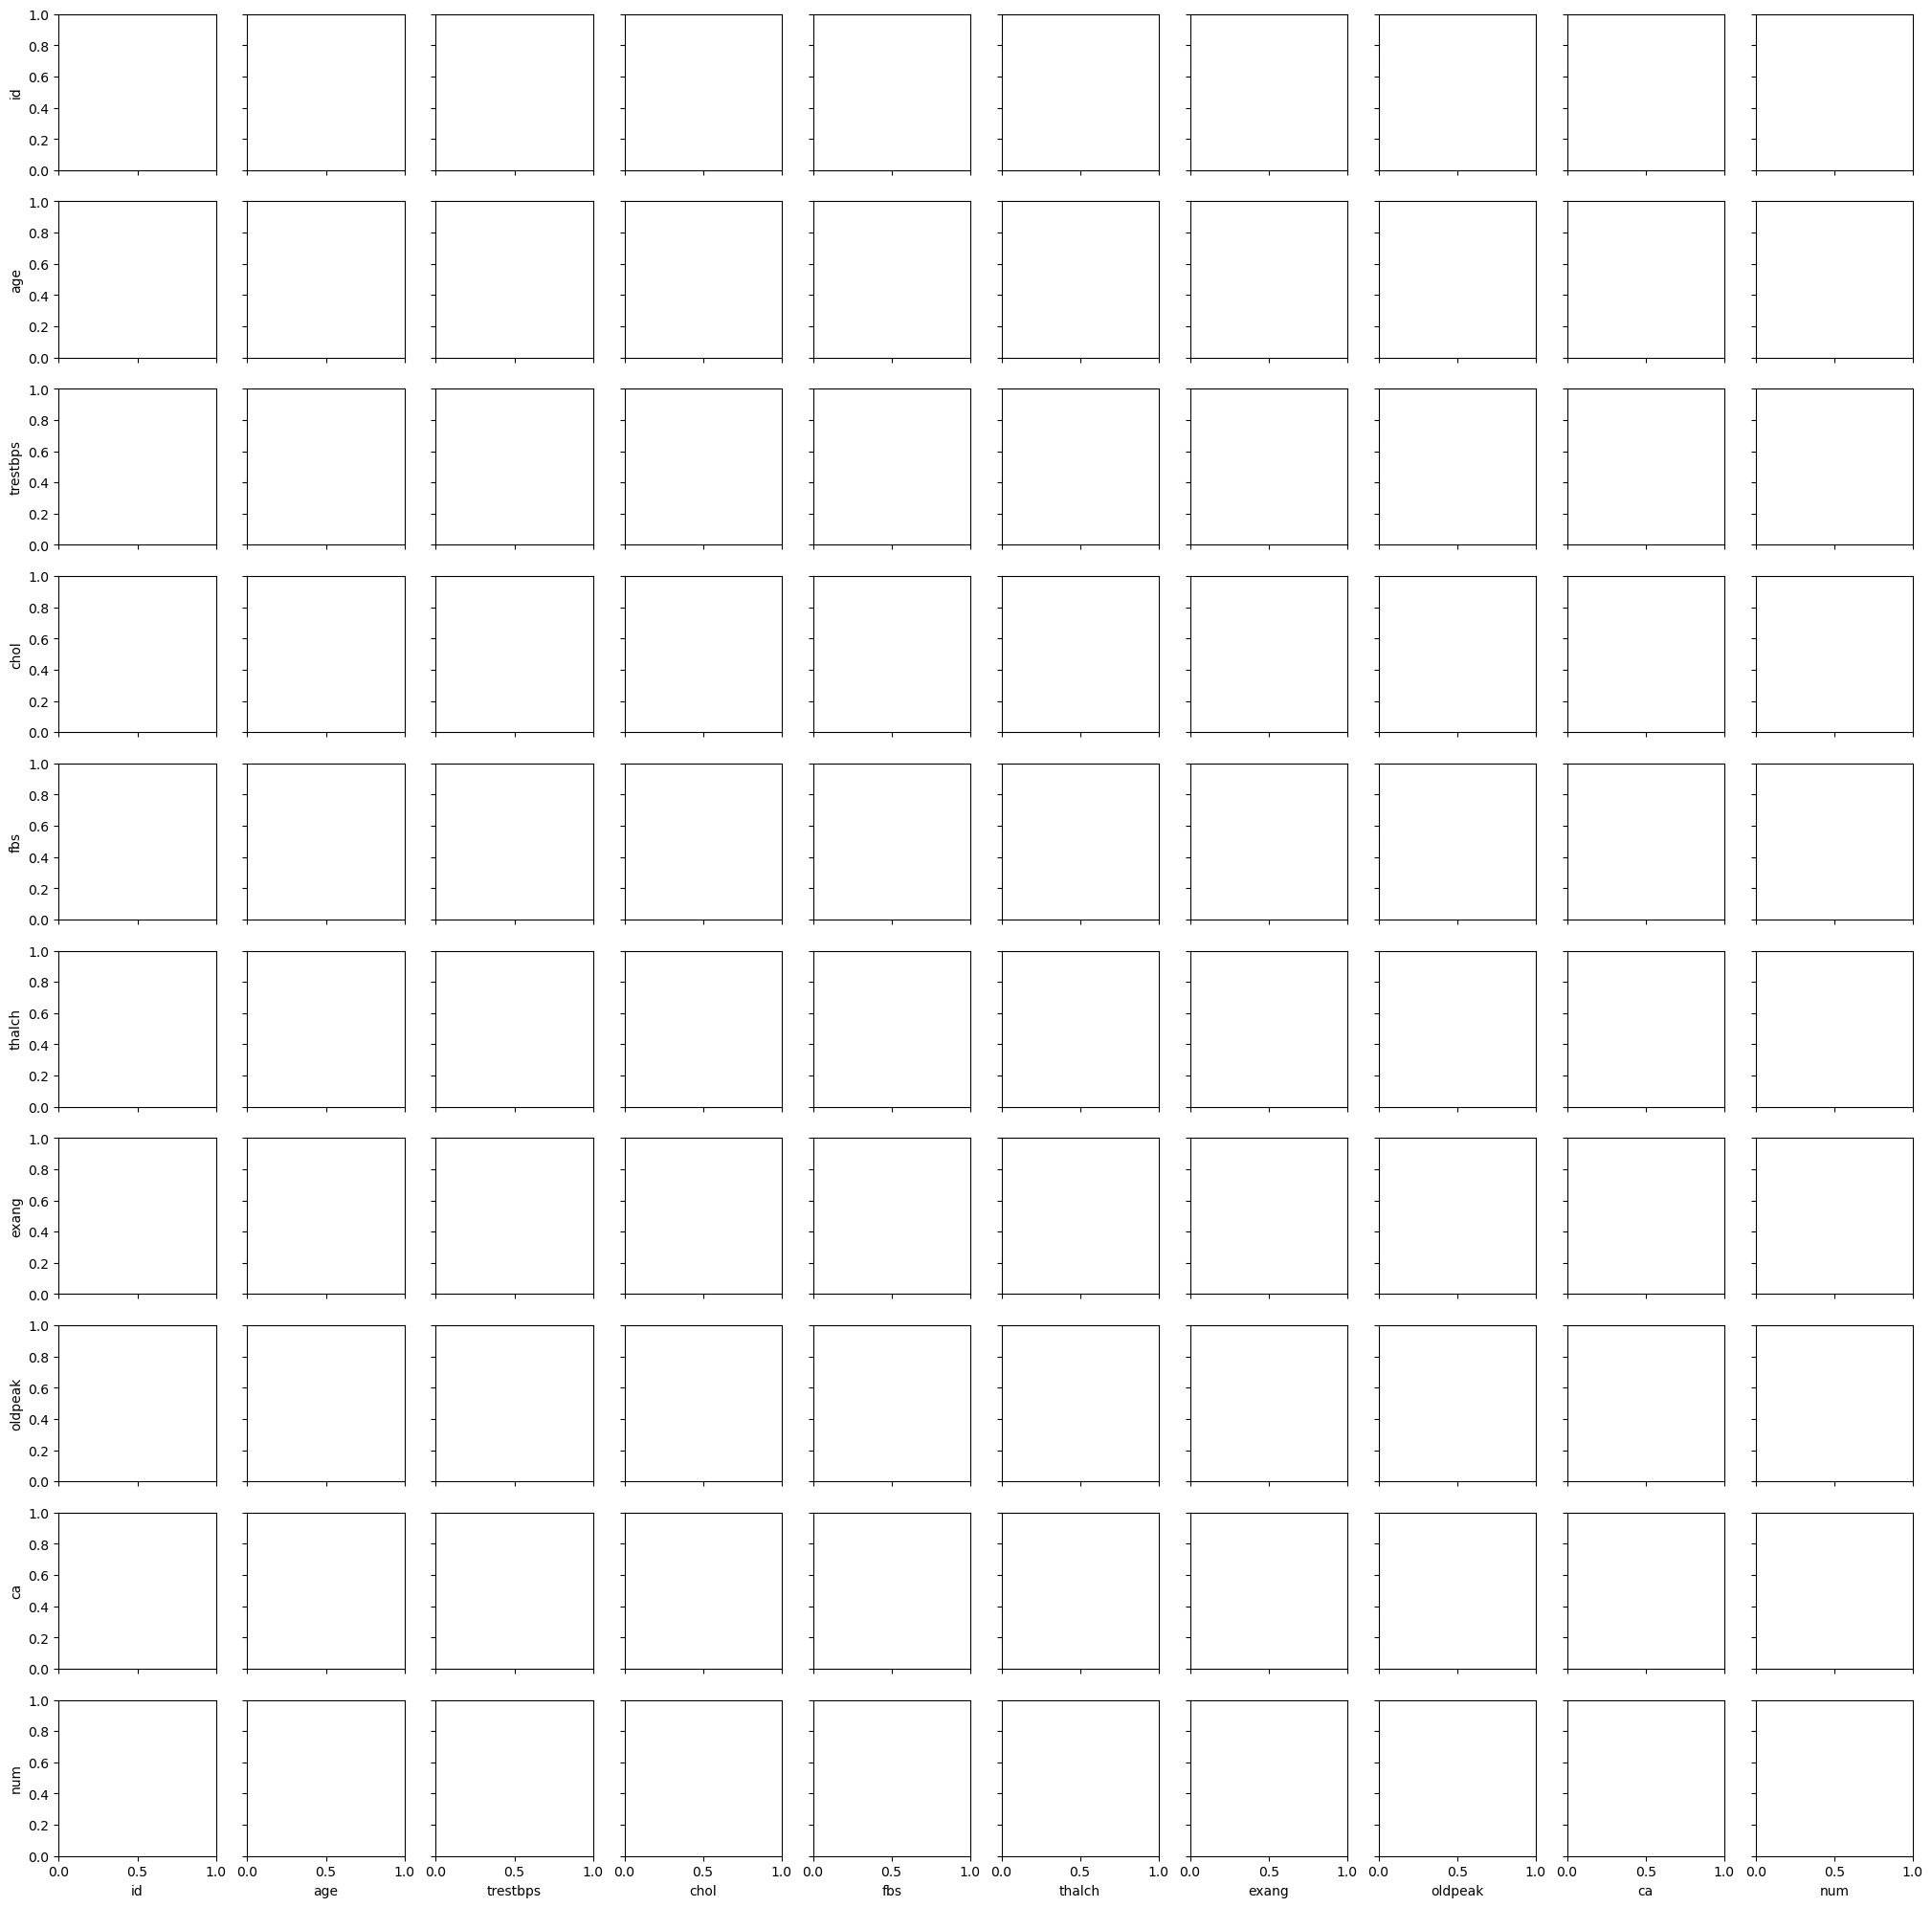

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV

# Step 1: Load the dataset
file_path = "C:\\Users\\Administrator\\OneDrive\\Desktop\\Fatima-Labs\\ML\\lab 11\\heart_disease_uci.csv"
df = pd.read_csv(file_path)

# Step 1.1: Check column names to identify the target variable
print("Column Names in the Dataset:\n", df.columns)

# Assuming the target variable is the last column
target_column = 'target'  # Update this if the target column has a different name

# Step 1.2: Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Handle missing values for numerical columns (use median strategy)
numerical_imputer = SimpleImputer(strategy='median')
df[numerical_cols] = numerical_imputer.fit_transform(df[numerical_cols])

# Handle missing values for categorical columns (use most frequent value strategy)
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

# Check if there are any missing values now
print("\nMissing values after preprocessing:\n", df.isnull().sum())

# Step 2: Exploratory Data Analysis (EDA)
# Display basic statistics
print("\nBasic statistics of the dataset:\n", df.describe())

# Visualize the distribution of features
sns.pairplot(df, hue=target_column)
plt.show()

# Step 3: Feature Engineering
# Encode categorical variables (if any)
df = pd.get_dummies(df, drop_first=True)

# Separate features (X) and target (y)
X = df.drop(target_column, axis=1)
y = df[target_column]

# Normalize numerical features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Model selection and training
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the SVM model (linear kernel)
svm = SVC(kernel='linear')

# Train the SVM model
svm.fit(X_train, y_train)

# Step 5: Model evaluation
# Predict on the testing set
y_pred = svm.predict(X_test)

# Evaluate the model
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Step 6: Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
print("\nBest Parameters from GridSearchCV:\n", grid_search.best_params_)
print("\nBest Score from GridSearchCV:", grid_search.best_score_)

# Retrain the model with the best parameters
best_svm = grid_search.best_estimator_
best_svm.fit(X_train, y_train)

# Step 7: Conclusion
# Evaluate the final model on the test set
y_pred_best = best_svm.predict(X_test)
print("\nFinal Classification Report (Best Model):\n", classification_report(y_test, y_pred_best))
print("\nFinal Confusion Matrix (Best Model):\n", confusion_matrix(y_test, y_pred_best))

# Visualize the confusion matrix for the best model
cm_best = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm_best, annot=True, fmt="d", cmap="Blues", xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Best Model)')
plt.show()

# Insights on the most important features (if available)
# Feature importance can be derived from SVM with linear kernel coefficients
if 'coef_' in dir(best_svm):
    feature_importance = pd.Series(best_svm.coef_.flatten(), index=X.columns)
    feature_importance = feature_importance.sort_values(ascending=False)
    print("\nFeature Importance:\n", feature_importance)


In [14]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

# Load dataset
df = pd.read_csv("heart_disease_uci.csv")

# Display feature names
print("Columns: ", df.columns.tolist())

# Drop unnecessary columns
df = df.drop(columns=['id', 'dataset'])

# Convert target variable into binary (0 = No Disease, 1 = Disease)
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)
df = df.drop(columns=['num'])  # Remove original target column

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Impute missing values for numerical columns with the mean
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Impute missing values for categorical columns with the mode (most frequent value)
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

# Encode categorical variables
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# Show first few rows
print("\nFirst 5 rows:\n", df.head())

# EDA: Distribution of target
sns.countplot(x='target', data=df)
plt.title("Heart Disease Distribution (0 = No, 1 = Yes)")
plt.show()

# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(df.drop(columns=['target']))
y = df['target']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a svm Classifier with linear kernel
clf = svm.SVC(kernel='linear')

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Evaluation
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1 Score:", metrics.f1_score(y_test, y_pred))

# Confusion Matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Optional: Hyperparameter Tuning with GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=0)
grid.fit(X_train, y_train)

# Best parameters and final model evaluation
print("\nBest Parameters:", grid.best_params_)
best_model = grid.best_estimator_
y_best_pred = best_model.predict(X_test)
print("Tuned Model Accuracy:", metrics.accuracy_score(y_test, y_best_pred))

FileNotFoundError: [Errno 2] No such file or directory: 'heart_disease_uci.csv'